# Music Genre Classification

Dataset link : http://marsyas.info/downloads/datasets.html

In [4]:
import os
DATASET_PATH = r'D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced'
for i, (dirpath, dirnames,  filenames) in enumerate(os.walk(DATASET_PATH)):
    print(i)
    print(dirpath)
    print(dirnames)
    print(filenames)
    print('======================================')

0
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
[]
1
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues
[]
['blues.00000.wav']
2
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\classical
[]
['classical.00000.wav']
3
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\country
[]
['country.00000.wav']
4
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\disco
[]
['disco.00000.wav']
5
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\hiphop
[]
['hiphop.00000.wav']
6
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\jazz
[]
['jazz.00000.wav']
7
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\metal
[]
['metal.00000.wav']
8
D:\Da

In [17]:
import os
DATASET_PATH = r'D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced'
for dirpath, dirnames,  filenames in os.walk(DATASET_PATH):
    print(dirpath.split('\\')[-1])
    print(dirnames)
    print(filenames)
    print('======================================')

genres _dataset_reduced
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
[]
blues
[]
['blues.00000.wav']
classical
[]
['classical.00000.wav']
country
[]
['country.00000.wav']
disco
[]
['disco.00000.wav']
hiphop
[]
['hiphop.00000.wav']
jazz
[]
['jazz.00000.wav']
metal
[]
['metal.00000.wav']
pop
[]
['pop.00000.wav']
reggae
[]
['reggae.00000.wav']
rock
[]
['rock.00000.wav']


# Preparing the data !

In [27]:
import os
import librosa
import math
import json

DATASET_PATH = r'D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced'
JSON_PATH = "data.json"

SAMPLE_RATE = 22050
DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION # means this many data points per song track!



def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length=512, num_segments=5):
    
    # dictionary to store the data
    data = {
        "mapping" : [],
        "mfcc" : [],
        "labels" : []
    }
    
    num_samples_per_segment = int(SAMPLES_PER_TRACK/num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment/hop_length) # 1.2 - > 2
    # num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    
    # loop thourgh all the genres
    for i , (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # checking that we are not at root level
        if dirpath is not dataset_path :
            
            # save the label
            semantic_label = dirpath.split("\\")[-1]
            data["mapping"].append(semantic_label)
            print("\n Processing {}".format(semantic_label))
            
            # processing the files for genre one by one
            for f in filenames :
                
                file_path = os.path.join(dirpath,f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # process segments extracting mfcc and storing those mfcc data
                for s in range(num_segments) :
                    
                    start_sample = s * num_samples_per_segment # s=0 -> 0
                    finish_sample = start_sample + num_samples_per_segment # 0 + num_samples_per_segment
                    
                                              
                    
                                              
                    
                    mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                 sr=sr,
                                                 n_fft=n_fft,
                                                 n_mfcc=n_mfcc,
                                                 hop_length=hop_length)
                    mfcc = mfcc.T
                    
                      
                    # store mfcc for segment if it has the expected length 
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment : {}".format(file_path, s+1))
                                              
                                              
                                              
                                              
    with open(json_path, "w") as ff :
         json.dump(data, ff, indent=4)
            
if __name__ == "__main__" :
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


 Processing blues
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 1
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 2
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 3
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 4
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 5
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 6
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 7
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\blues\blues.00000.wav, segment : 8
D:\Data Science\kaggle_datasets\Audio

D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 2
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 3
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 4
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 5
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 6
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 7
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 8
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\pop.00000.wav, segment : 9
D:\Data Science\kaggle_datasets\AudioSignalProcessingForML\genres _dataset_reduced\pop\p

In [28]:
# Load the data
# split into train/test set
# build the network architecture
# compile the network
# train network

# building the model

In [57]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf


def load_data(dataset_path):
    with open(dataset_path, "r") as fi :
        data = json.load(fi)
        
    # convert list into numpy array bcoz labels and mfccs are stored into lists
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs,targets

if __name__ == "__main__" :
    inputs, targets = load_data('data.json')
    
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                              targets,
                                                                              test_size=0.3)
    
    model = tf.keras.Sequential([
        
        # inputs.shape is a 3D array of 100*130*13 and index 0 represents different segments
        
        tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])), 
        tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation="relu",  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation="softmax")
        
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer = optimizer,
                  metrics=["accuracy"])
    
    model.summary()
    
    
    
    
    
    
    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [58]:
inputs.shape # 100 means there are 100 segments ie... 100 examples

(100, 130, 13)

### we applied dropout and regularizer in our network

In [59]:
hist = model.fit(inputs_train, targets_train,
                 validation_data = (inputs_test, targets_test),
                 epochs=500, 
                 batch_size=128)

Train on 70 samples, validate on 30 samples
Epoch 1/500
70/70 [==============================] - 1s 10ms/sample - loss: 89.7448 - accuracy: 0.1286 - val_loss: 35.6064 - val_accuracy: 0.1333
Epoch 2/500
70/70 [==============================] - 0s 228us/sample - loss: 86.7195 - accuracy: 0.1143 - val_loss: 28.1089 - val_accuracy: 0.1333
Epoch 3/500
70/70 [==============================] - 0s 215us/sample - loss: 68.9520 - accuracy: 0.1857 - val_loss: 23.4126 - val_accuracy: 0.2000
Epoch 4/500
70/70 [==============================] - 0s 214us/sample - loss: 60.0155 - accuracy: 0.1429 - val_loss: 19.8451 - val_accuracy: 0.2333
Epoch 5/500
70/70 [==============================] - 0s 214us/sample - loss: 59.3307 - accuracy: 0.1143 - val_loss: 17.2065 - val_accuracy: 0.1667
Epoch 6/500
70/70 [==============================] - 0s 228us/sample - loss: 45.0842 - accuracy: 0.1857 - val_loss: 15.0982 - val_accuracy: 0.2333
Epoch 7/500
70/70 [==============================] - 0s 200us/sample - loss

Epoch 57/500
70/70 [==============================] - 0s 186us/sample - loss: 6.9697 - accuracy: 0.4571 - val_loss: 3.7925 - val_accuracy: 0.4333
Epoch 58/500
70/70 [==============================] - 0s 209us/sample - loss: 8.0875 - accuracy: 0.4714 - val_loss: 3.7705 - val_accuracy: 0.4333
Epoch 59/500
70/70 [==============================] - 0s 198us/sample - loss: 8.6380 - accuracy: 0.3857 - val_loss: 3.7687 - val_accuracy: 0.4667
Epoch 60/500
70/70 [==============================] - 0s 179us/sample - loss: 5.6999 - accuracy: 0.6143 - val_loss: 3.7579 - val_accuracy: 0.5000
Epoch 61/500
70/70 [==============================] - 0s 157us/sample - loss: 8.4288 - accuracy: 0.5286 - val_loss: 3.7338 - val_accuracy: 0.5000
Epoch 62/500
70/70 [==============================] - 0s 181us/sample - loss: 11.1727 - accuracy: 0.4429 - val_loss: 3.6946 - val_accuracy: 0.5000
Epoch 63/500
70/70 [==============================] - 0s 171us/sample - loss: 9.0248 - accuracy: 0.4429 - val_loss: 3.6580 

Epoch 114/500
70/70 [==============================] - 0s 197us/sample - loss: 4.6722 - accuracy: 0.6714 - val_loss: 3.0701 - val_accuracy: 0.7000
Epoch 115/500
70/70 [==============================] - 0s 186us/sample - loss: 4.2122 - accuracy: 0.6857 - val_loss: 3.0557 - val_accuracy: 0.7000
Epoch 116/500
70/70 [==============================] - 0s 193us/sample - loss: 4.6600 - accuracy: 0.6571 - val_loss: 3.0339 - val_accuracy: 0.7000
Epoch 117/500
70/70 [==============================] - 0s 200us/sample - loss: 4.3612 - accuracy: 0.7000 - val_loss: 3.0155 - val_accuracy: 0.7000
Epoch 118/500
70/70 [==============================] - 0s 171us/sample - loss: 3.7075 - accuracy: 0.6714 - val_loss: 2.9964 - val_accuracy: 0.7000
Epoch 119/500
70/70 [==============================] - 0s 168us/sample - loss: 4.0594 - accuracy: 0.6714 - val_loss: 2.9732 - val_accuracy: 0.6667
Epoch 120/500
70/70 [==============================] - 0s 185us/sample - loss: 3.8632 - accuracy: 0.7143 - val_loss: 2

Epoch 170/500
70/70 [==============================] - 0s 200us/sample - loss: 2.9339 - accuracy: 0.8286 - val_loss: 2.6506 - val_accuracy: 0.7000
Epoch 171/500
70/70 [==============================] - 0s 200us/sample - loss: 2.4765 - accuracy: 0.7857 - val_loss: 2.6181 - val_accuracy: 0.7000
Epoch 172/500
70/70 [==============================] - 0s 200us/sample - loss: 3.4338 - accuracy: 0.7571 - val_loss: 2.5841 - val_accuracy: 0.7333
Epoch 173/500
70/70 [==============================] - 0s 187us/sample - loss: 2.2552 - accuracy: 0.8571 - val_loss: 2.5698 - val_accuracy: 0.7000
Epoch 174/500
70/70 [==============================] - 0s 186us/sample - loss: 3.2082 - accuracy: 0.7571 - val_loss: 2.5742 - val_accuracy: 0.7000
Epoch 175/500
70/70 [==============================] - 0s 182us/sample - loss: 4.0015 - accuracy: 0.6143 - val_loss: 2.5557 - val_accuracy: 0.7333
Epoch 176/500
70/70 [==============================] - 0s 185us/sample - loss: 2.4466 - accuracy: 0.7714 - val_loss: 2

Epoch 226/500
70/70 [==============================] - 0s 186us/sample - loss: 1.6920 - accuracy: 0.9000 - val_loss: 2.3376 - val_accuracy: 0.7667
Epoch 227/500
70/70 [==============================] - 0s 186us/sample - loss: 1.6994 - accuracy: 0.8571 - val_loss: 2.3354 - val_accuracy: 0.7667
Epoch 228/500
70/70 [==============================] - 0s 171us/sample - loss: 1.9989 - accuracy: 0.8143 - val_loss: 2.3336 - val_accuracy: 0.7667
Epoch 229/500
70/70 [==============================] - 0s 185us/sample - loss: 1.9309 - accuracy: 0.8857 - val_loss: 2.3323 - val_accuracy: 0.7667
Epoch 230/500
70/70 [==============================] - 0s 185us/sample - loss: 2.7104 - accuracy: 0.8000 - val_loss: 2.3362 - val_accuracy: 0.7667
Epoch 231/500
70/70 [==============================] - 0s 171us/sample - loss: 1.6092 - accuracy: 0.9286 - val_loss: 2.3463 - val_accuracy: 0.8000
Epoch 232/500
70/70 [==============================] - 0s 171us/sample - loss: 1.9217 - accuracy: 0.8714 - val_loss: 2

Epoch 282/500
70/70 [==============================] - 0s 178us/sample - loss: 1.4448 - accuracy: 0.9286 - val_loss: 2.5648 - val_accuracy: 0.7333
Epoch 283/500
70/70 [==============================] - 0s 200us/sample - loss: 1.4273 - accuracy: 0.9286 - val_loss: 2.5734 - val_accuracy: 0.7333
Epoch 284/500
70/70 [==============================] - 0s 195us/sample - loss: 1.6544 - accuracy: 0.9143 - val_loss: 2.5678 - val_accuracy: 0.7333
Epoch 285/500
70/70 [==============================] - 0s 172us/sample - loss: 1.5109 - accuracy: 0.9429 - val_loss: 2.5565 - val_accuracy: 0.7333
Epoch 286/500
70/70 [==============================] - 0s 185us/sample - loss: 1.9385 - accuracy: 0.8571 - val_loss: 2.5416 - val_accuracy: 0.7333
Epoch 287/500
70/70 [==============================] - 0s 185us/sample - loss: 1.9555 - accuracy: 0.8286 - val_loss: 2.5508 - val_accuracy: 0.7333
Epoch 288/500
70/70 [==============================] - 0s 186us/sample - loss: 1.4765 - accuracy: 0.8857 - val_loss: 2

Epoch 338/500
70/70 [==============================] - 0s 200us/sample - loss: 1.7013 - accuracy: 0.8857 - val_loss: 2.2840 - val_accuracy: 0.7667
Epoch 339/500
70/70 [==============================] - 0s 186us/sample - loss: 1.6383 - accuracy: 0.9143 - val_loss: 2.2956 - val_accuracy: 0.7667
Epoch 340/500
70/70 [==============================] - 0s 194us/sample - loss: 2.0802 - accuracy: 0.8857 - val_loss: 2.3088 - val_accuracy: 0.7667
Epoch 341/500
70/70 [==============================] - 0s 181us/sample - loss: 1.7708 - accuracy: 0.9143 - val_loss: 2.3134 - val_accuracy: 0.7667
Epoch 342/500
70/70 [==============================] - 0s 176us/sample - loss: 1.8012 - accuracy: 0.9000 - val_loss: 2.3245 - val_accuracy: 0.7667
Epoch 343/500
70/70 [==============================] - 0s 171us/sample - loss: 1.4725 - accuracy: 0.9286 - val_loss: 2.3179 - val_accuracy: 0.8000
Epoch 344/500
70/70 [==============================] - 0s 169us/sample - loss: 1.5928 - accuracy: 0.9143 - val_loss: 2

Epoch 394/500
70/70 [==============================] - 0s 186us/sample - loss: 1.8637 - accuracy: 0.9286 - val_loss: 2.3654 - val_accuracy: 0.7667
Epoch 395/500
70/70 [==============================] - 0s 200us/sample - loss: 1.8111 - accuracy: 0.8714 - val_loss: 2.3555 - val_accuracy: 0.7667
Epoch 396/500
70/70 [==============================] - 0s 200us/sample - loss: 1.6517 - accuracy: 0.9143 - val_loss: 2.3454 - val_accuracy: 0.7667
Epoch 397/500
70/70 [==============================] - 0s 186us/sample - loss: 1.7521 - accuracy: 0.9000 - val_loss: 2.3558 - val_accuracy: 0.7667
Epoch 398/500
70/70 [==============================] - 0s 186us/sample - loss: 1.4853 - accuracy: 0.9429 - val_loss: 2.3650 - val_accuracy: 0.7667
Epoch 399/500
70/70 [==============================] - 0s 186us/sample - loss: 1.4569 - accuracy: 0.9429 - val_loss: 2.3726 - val_accuracy: 0.7667
Epoch 400/500
70/70 [==============================] - 0s 186us/sample - loss: 1.7018 - accuracy: 0.9571 - val_loss: 2

Epoch 450/500
70/70 [==============================] - 0s 200us/sample - loss: 1.5327 - accuracy: 0.9286 - val_loss: 1.9521 - val_accuracy: 0.8667
Epoch 451/500
70/70 [==============================] - 0s 199us/sample - loss: 1.3595 - accuracy: 0.9571 - val_loss: 1.9810 - val_accuracy: 0.8667
Epoch 452/500
70/70 [==============================] - 0s 186us/sample - loss: 1.5522 - accuracy: 0.8857 - val_loss: 2.0134 - val_accuracy: 0.8667
Epoch 453/500
70/70 [==============================] - 0s 171us/sample - loss: 1.4146 - accuracy: 0.9429 - val_loss: 2.0432 - val_accuracy: 0.8333
Epoch 454/500
70/70 [==============================] - 0s 185us/sample - loss: 1.2978 - accuracy: 0.9571 - val_loss: 2.0700 - val_accuracy: 0.8333
Epoch 455/500
70/70 [==============================] - 0s 175us/sample - loss: 1.4176 - accuracy: 0.9286 - val_loss: 2.0852 - val_accuracy: 0.8333
Epoch 456/500
70/70 [==============================] - 0s 200us/sample - loss: 1.2335 - accuracy: 0.9571 - val_loss: 2

In [42]:
inputs_train.shape, inputs.shape

((70, 130, 13), (100, 130, 13))

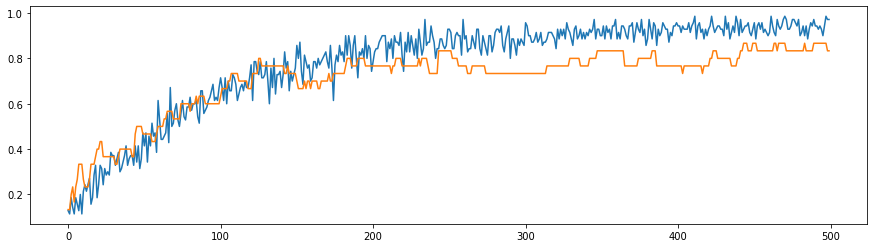

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,4))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

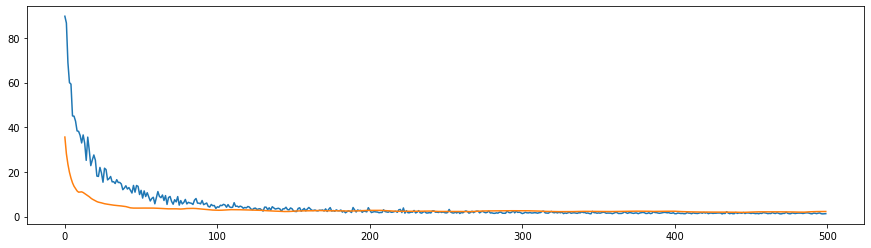

In [64]:
plt.figure(figsize=(15,4))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()